### CARICAMENTO DEL DATASET

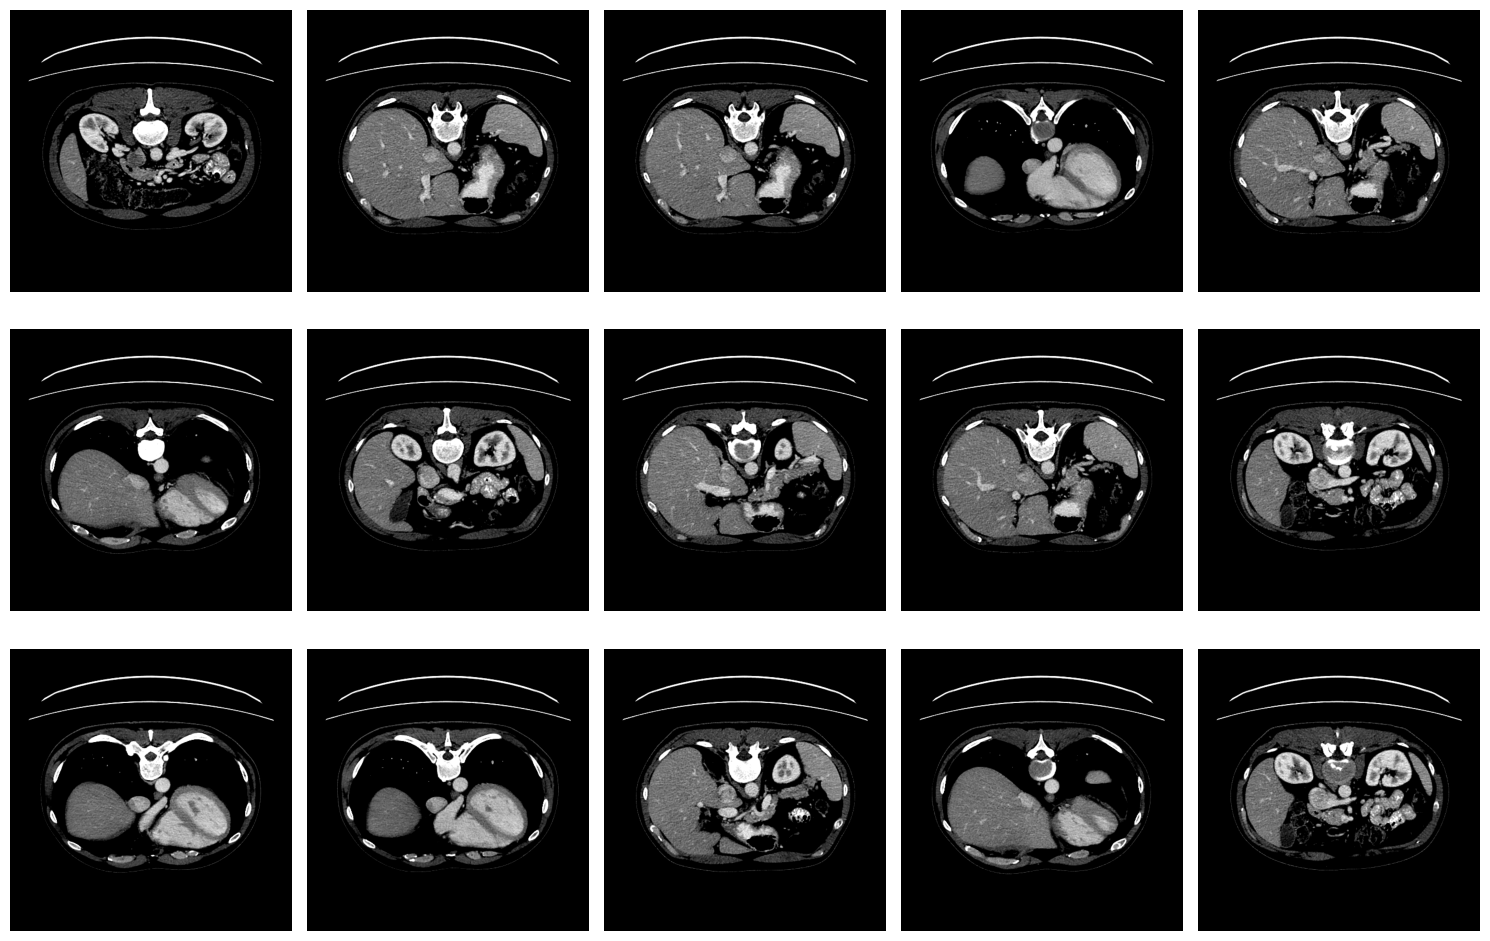

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Definisci il percorso della cartella "train" sulla scrivania
desktop_path = '/home/giovanni01/Scrivania/Medical Imaging Denoising/Autoencoder/Dataset'

# Componi il percorso completo della cartella "train"
train_folder = os.path.join(desktop_path, 'train')

# Leggi i nomi dei file delle immagini nella cartella "train"
image_files = os.listdir(train_folder)[:15]

# Crea una griglia 3x5 per visualizzare le immagini
rows, cols = 3, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Mostra le immagini sulla griglia in scala di grigi e più grandi
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_folder, image_files[i])
    img = mpimg.imread(image_path)
    ax.imshow(img, cmap='gray')  # Mostra l'immagine in scala di grigi
    ax.axis('off')

# Mostra il plot con le immagini
plt.tight_layout()
plt.show()


### APPLICAZIONE DEL RUMORE

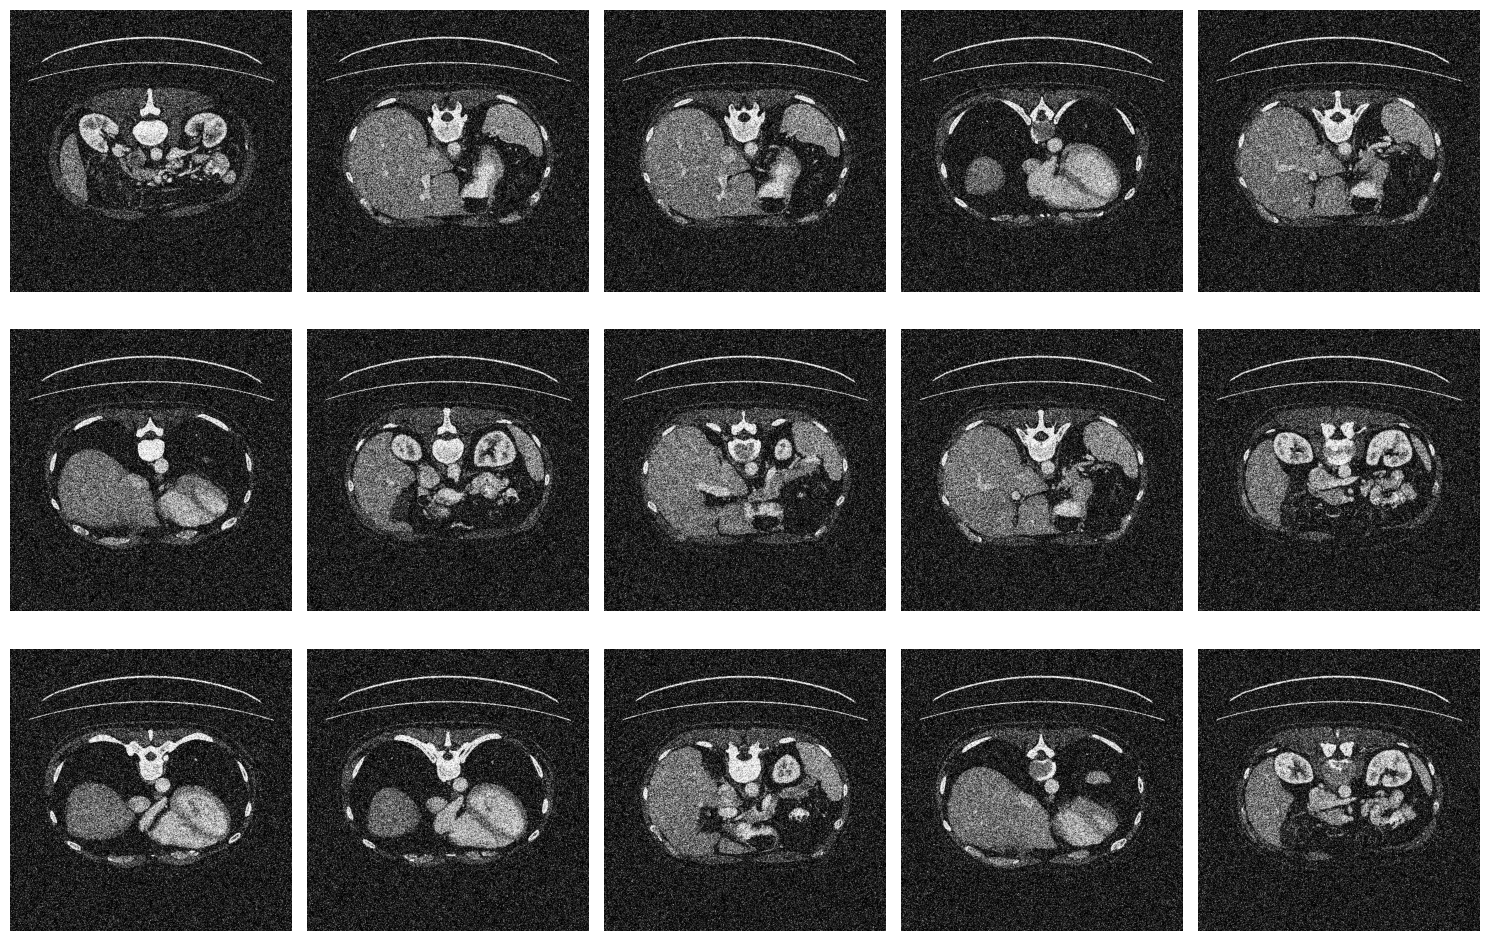

In [2]:
# Leggi i nomi dei file delle immagini nella cartella "train"
image_files = os.listdir(train_folder)[:15]

# Definisci il noise factor
noise_factor = 0.3

# Crea una griglia 3x5 per visualizzare le immagini
rows, cols = 3, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Applica il rumore e mostra le immagini sulla griglia
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(train_folder, image_files[i])
    img = mpimg.imread(image_path)
    noisy_image = img + noise_factor * np.random.randn(*img.shape)  # Applica il rumore gaussiano
    noisy_image = np.clip(noisy_image, 0, 1)  # Assicurati che i valori dei pixel siano compresi tra 0 e 1
    ax.imshow(noisy_image, cmap='gray')  # Mostra l'immagine con rumore in scala di grigi
    ax.axis('off')

# Mostra il plot con le immagini
plt.tight_layout()
plt.show()


### DENOISING CON REGRESSIONE RIDGE

/tmp/ipykernel_104833/386429392.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
/tmp/ipykernel_104833/386429392.py:60: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_denoised_ridge = metrics.peak_signal_noise_ratio(img, denoised_image_ridge_filtered)
/tmp/ipykernel_104833/386429392.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
/tmp/ipykernel_104833/386429392.py:60: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_denoised_ridge = metrics.peak_signal_noise_ratio(img, denoised_image_ridge_filtered)
/tmp/ipykernel_104833/386429392.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
/tmp/i

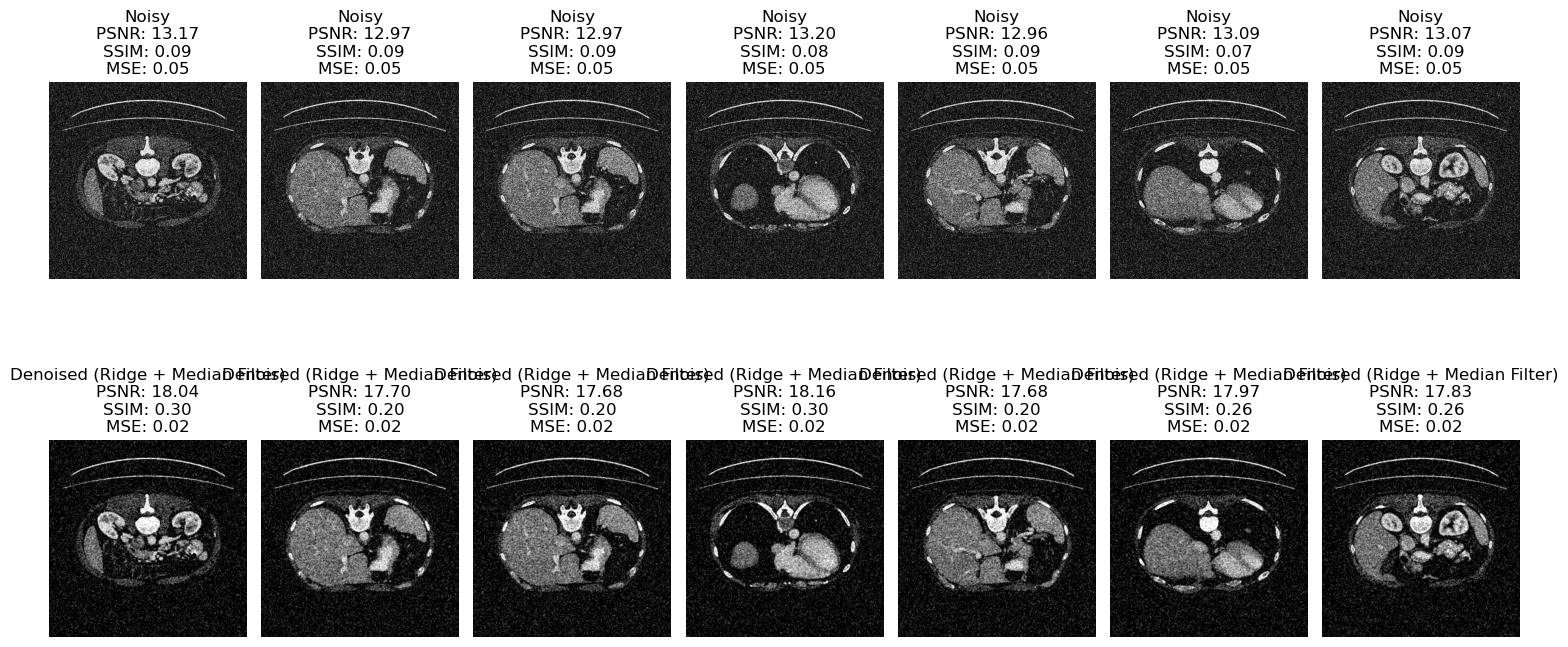

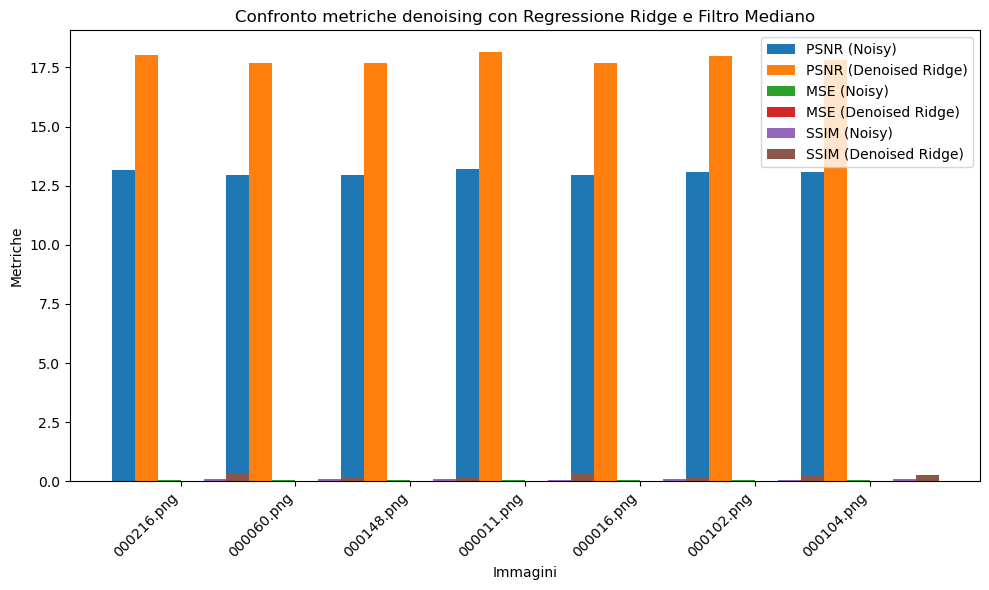

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import metrics
from scipy.signal import medfilt
from sklearn.linear_model import Ridge

# Leggi i nomi dei file delle immagini nella cartella "train"
image_files = os.listdir(train_folder)[:7]  # Usa solo le prime 7 immagini

# Definisci il noise factor
noise_factor = 0.3

# Crea una griglia 2x7 per visualizzare le immagini e le metriche
rows, cols = 2, 7
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

# Liste per salvare le metriche PSNR, MSE e SSIM con regressione ridge per immagini rumorose e denoised
psnr_values_noisy = []
mse_values_noisy = []
ssim_values_noisy = []
psnr_values_denoised_ridge = []
mse_values_denoised_ridge = []
ssim_values_denoised_ridge = []

# Applica il rumore e mostra le immagini sulla griglia
for i, ax in enumerate(axes[0]):
    image_path = os.path.join(train_folder, image_files[i])
    img = mpimg.imread(image_path)
    noisy_image = img + noise_factor * np.random.randn(*img.shape)  # Applica il rumore gaussiano
    noisy_image = np.clip(noisy_image, 0, 1)  # Assicurati che i valori dei pixel siano compresi tra 0 e 1
    
    ax.imshow(noisy_image, cmap='gray')  # Mostra l'immagine rumorosa in scala di grigi
    ax.axis('off')

    # Calcola e mostra le metriche PSNR, SSIM e MSE delle immagini rumorose
    if np.array_equal(img, noisy_image):
        psnr_noisy = float('inf')
        mse_noisy = 0.0
        ssim_noisy = 1.0
    else:
        psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
        mse_noisy = metrics.mean_squared_error(img, noisy_image)
        ssim_noisy = metrics.structural_similarity(img, noisy_image, data_range=1.0, multichannel=True)

    ax.set_title(f"Noisy\nPSNR: {psnr_noisy:.2f}\nSSIM: {ssim_noisy:.2f}\nMSE: {mse_noisy:.2f}")

    # Esegui il denoising basato su regressione ridge
    model = Ridge(alpha=0.1)  # Imposta il parametro di regolarizzazione (alpha)
    X = np.reshape(noisy_image, (-1, 1))
    y = np.reshape(img, (-1, 1))
    model.fit(X, y)
    denoised_image_ridge = np.reshape(model.predict(X), img.shape)

    # Applica il filtro mediano all'immagine denoised
    denoised_image_ridge_filtered = medfilt(denoised_image_ridge)

    # Calcola e salva le metriche PSNR, SSIM e MSE delle immagini denoised con regressione ridge e filtro mediano
    psnr_denoised_ridge = metrics.peak_signal_noise_ratio(img, denoised_image_ridge_filtered)
    ssim_denoised_ridge = metrics.structural_similarity(img, denoised_image_ridge_filtered, data_range=1.0, multichannel=True)
    mse_denoised_ridge = metrics.mean_squared_error(img, denoised_image_ridge_filtered)

    psnr_values_noisy.append(psnr_noisy)
    mse_values_noisy.append(mse_noisy)
    ssim_values_noisy.append(ssim_noisy)
    psnr_values_denoised_ridge.append(psnr_denoised_ridge)
    mse_values_denoised_ridge.append(mse_denoised_ridge)
    ssim_values_denoised_ridge.append(ssim_denoised_ridge)

    ax = axes[1, i]
    ax.imshow(denoised_image_ridge_filtered, cmap='gray')  # Mostra l'immagine denoised con regressione ridge e filtro mediano in scala di grigi
    ax.set_title(f"Denoised (Ridge + Median Filter)\nPSNR: {psnr_denoised_ridge:.2f}\nSSIM: {ssim_denoised_ridge:.2f}\nMSE: {mse_denoised_ridge:.2f}")
    ax.axis('off')

# Mostra il plot con le immagini rumorose e denoised con regressione ridge e filtro mediano
plt.tight_layout()
plt.show()

# Crea il grafico di confronto tra le metriche delle immagini rumorose e denoised con regressione ridge e filtro mediano
plt.figure(figsize=(10, 6))
x = np.arange(len(image_files))
width = 0.2
plt.bar(x, psnr_values_noisy, width=width, label='PSNR (Noisy)')
plt.bar(x + width, psnr_values_denoised_ridge, width=width, label='PSNR (Denoised Ridge)')
plt.bar(x + 2 * width, mse_values_noisy, width=width, label='MSE (Noisy)')
plt.bar(x + 3 * width, mse_values_denoised_ridge, width=width, label='MSE (Denoised Ridge)')
plt.bar(x + 4 * width, ssim_values_noisy, width=width, label='SSIM (Noisy)')
plt.bar(x + 5 * width, ssim_values_denoised_ridge, width=width, label='SSIM (Denoised Ridge)')
plt.xticks(x + 2.5 * width, image_files, rotation=45, ha='right')
plt.xlabel('Immagini')
plt.ylabel('Metriche')
plt.title('Confronto metriche denoising con Regressione Ridge e Filtro Mediano')
plt.legend()
plt.tight_layout()
plt.show()


### DENOISING CON DECONVOLUZIONE 

/tmp/ipykernel_104833/3080007369.py:41: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
/tmp/ipykernel_104833/3080007369.py:66: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_denoised = metrics.peak_signal_noise_ratio(img, deconvolved_image)


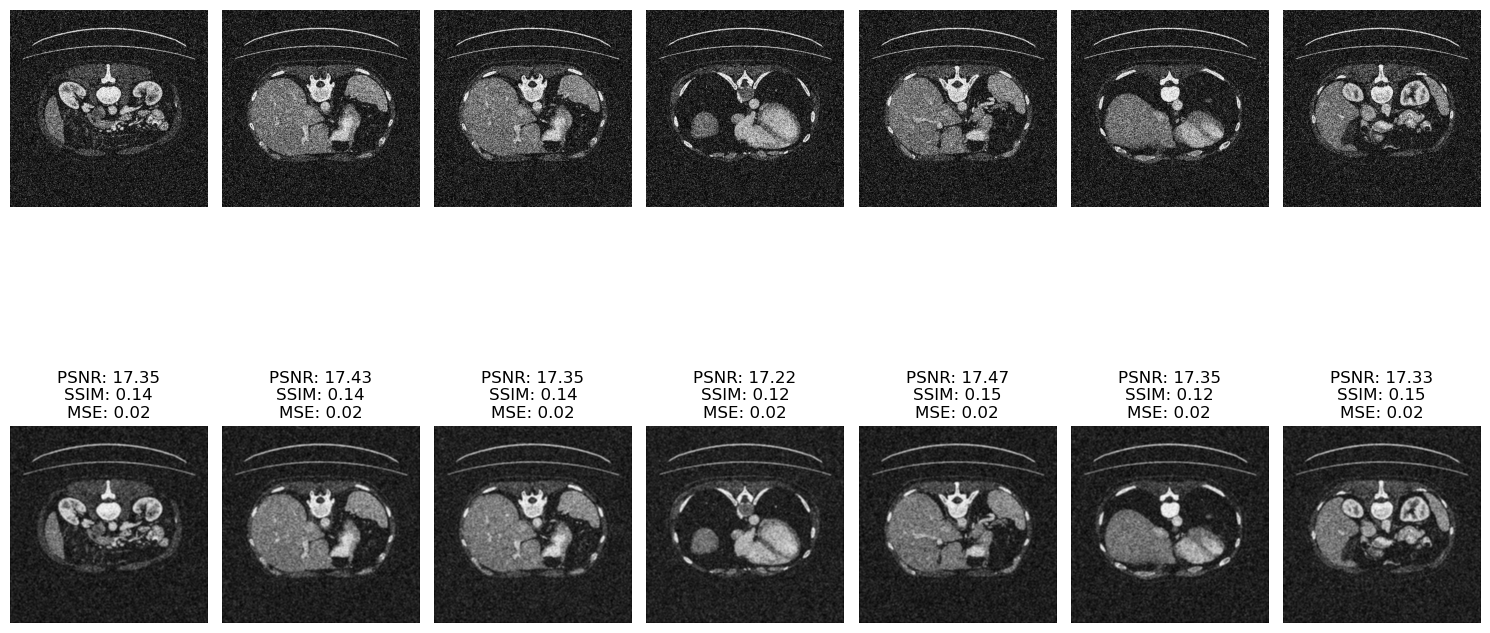

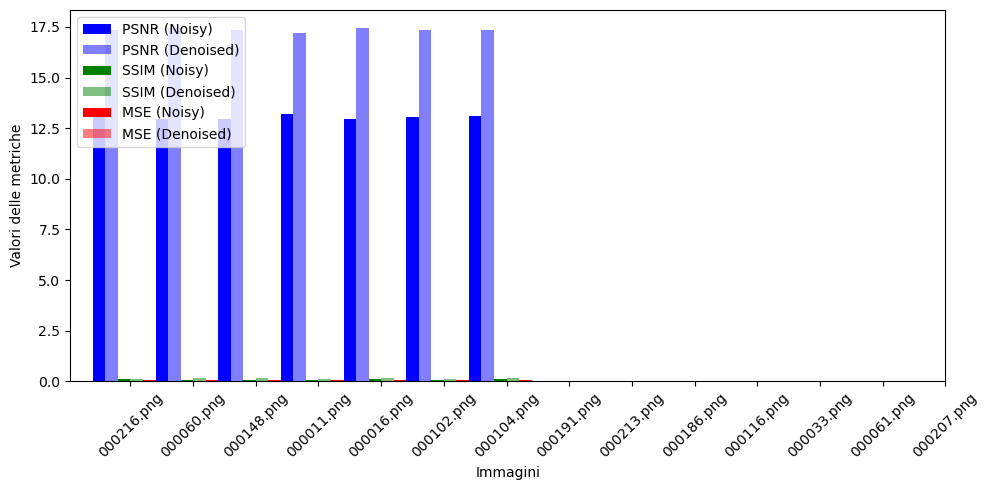

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.signal import convolve2d, fftconvolve
from scipy.ndimage import gaussian_filter
from skimage import metrics
from scipy.signal import medfilt

# Leggi i nomi dei file delle immagini nella cartella "train"
image_files = os.listdir(train_folder)[:14]

# Definisci il noise factor
noise_factor = 0.3

# Crea una griglia 2x7 per visualizzare le immagini e le metriche
rows, cols = 2, 7
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Liste per memorizzare le metriche di valutazione delle immagini noised
psnr_values_noisy = []
ssim_values_noisy = []
mse_values_noisy = []

# Liste per memorizzare le metriche di valutazione delle immagini denoised
psnr_values_denoised = []
ssim_values_denoised = []
mse_values_denoised = []

# Calcola e mostra le immagini rumorose sulla prima riga della griglia
for i, ax in enumerate(axes[0]):
    image_path = os.path.join(train_folder, image_files[i])
    img = mpimg.imread(image_path)
    noisy_image = img + noise_factor * np.random.randn(*img.shape)  # Applica il rumore gaussiano
    noisy_image = np.clip(noisy_image, 0, 1)  # Assicurati che i valori dei pixel siano compresi tra 0 e 1
    ax.imshow(noisy_image, cmap='gray')  # Mostra l'immagine rumorosa in scala di grigi
    ax.axis('off')

    filtered_image = median_filter(deconvolved_image, size=3)
    
    # Calcola le metriche dell'immagine rumorosa
    psnr_noisy = metrics.peak_signal_noise_ratio(img, noisy_image)
    ssim_noisy = metrics.structural_similarity(img, noisy_image, multichannel=True, data_range=noisy_image.max() - noisy_image.min())
    mse_noisy = metrics.mean_squared_error(img, noisy_image)

    # Aggiungi le metriche alle liste
    psnr_values_noisy.append(psnr_noisy)
    ssim_values_noisy.append(ssim_noisy)
    mse_values_noisy.append(mse_noisy)

# Applica la deconvoluzione  e mostra le immagini deconvolute sulla seconda riga della griglia
for i, ax in enumerate(axes[1]):
    image_path = os.path.join(train_folder, image_files[i])
    img = mpimg.imread(image_path)
    noisy_image = img + noise_factor * np.random.randn(*img.shape)  # Applica il rumore gaussiano
    noisy_image = np.clip(noisy_image, 0, 1)  # Assicurati che i valori dei pixel siano compresi tra 0 e 1
    
    # Esegui la deconvoluzione  nel dominio delle frequenze
    kernel = np.ones((5, 5))  # Definisci il kernel della deconvoluzione
    deconvolved_image = fftconvolve(noisy_image, kernel[::-1, ::-1], mode='same')
    deconvolved_image /= np.max(deconvolved_image)  # Normalizza i valori dei pixel tra 0 e 1
    
    ax.imshow(deconvolved_image, cmap='gray')  # Mostra l'immagine deconvoluta in scala di grigi
    ax.axis('off')

    # Calcola le metriche dell'immagine denoised
    psnr_denoised = metrics.peak_signal_noise_ratio(img, deconvolved_image)
    ssim_denoised = metrics.structural_similarity(img, deconvolved_image, multichannel=True, data_range=deconvolved_image.max() - deconvolved_image.min())
    mse_denoised = metrics.mean_squared_error(img, deconvolved_image)

    # Aggiungi le metriche alle liste
    psnr_values_denoised.append(psnr_denoised)
    ssim_values_denoised.append(ssim_denoised)
    mse_values_denoised.append(mse_denoised)

    # Aggiungi le metriche alla descrizione dell'immagine
    ax.set_title(f"PSNR: {psnr_denoised:.2f}\nSSIM: {ssim_denoised:.2f}\nMSE: {mse_denoised:.2f}")

# Mostra il plot con le immagini rumorose e deconvolute
plt.tight_layout()
plt.show()

# Crea il grafico di confronto tra le metriche delle immagini rumorose e delle immagini denoised
plt.figure(figsize=(10, 5))
x = np.arange(len(image_files))
width = 0.2
bar1 = plt.bar(x, psnr_values_noisy + [np.nan] * len(psnr_values_denoised), width=width, label='PSNR (Noisy)', align='center', color='blue')
bar2 = plt.bar(x + width, psnr_values_denoised + [np.nan] * len(psnr_values_noisy), width=width, label='PSNR (Denoised)', align='center', color='blue', alpha=0.5)
bar3 = plt.bar(x + 2 * width, ssim_values_noisy + [np.nan] * len(ssim_values_denoised), width=width, label='SSIM (Noisy)', align='center', color='green')
bar4 = plt.bar(x + 3 * width, ssim_values_denoised + [np.nan] * len(ssim_values_noisy), width=width, label='SSIM (Denoised)', align='center', color='green', alpha=0.5)
bar5 = plt.bar(x + 4 * width, mse_values_noisy + [np.nan] * len(mse_values_denoised), width=width, label='MSE (Noisy)', align='center', color='red')
bar6 = plt.bar(x + 5 * width, mse_values_denoised + [np.nan] * len(mse_values_noisy), width=width, label='MSE (Denoised)', align='center', color='red', alpha=0.5)
plt.xticks(x + 2.5 * width, image_files, rotation=45)
plt.xlabel('Immagini')
plt.ylabel('Valori delle metriche')
plt.legend()
plt.tight_layout()
plt.show()


### GRAFICO DI CONFRONTO 

/tmp/ipykernel_104833/1987586845.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


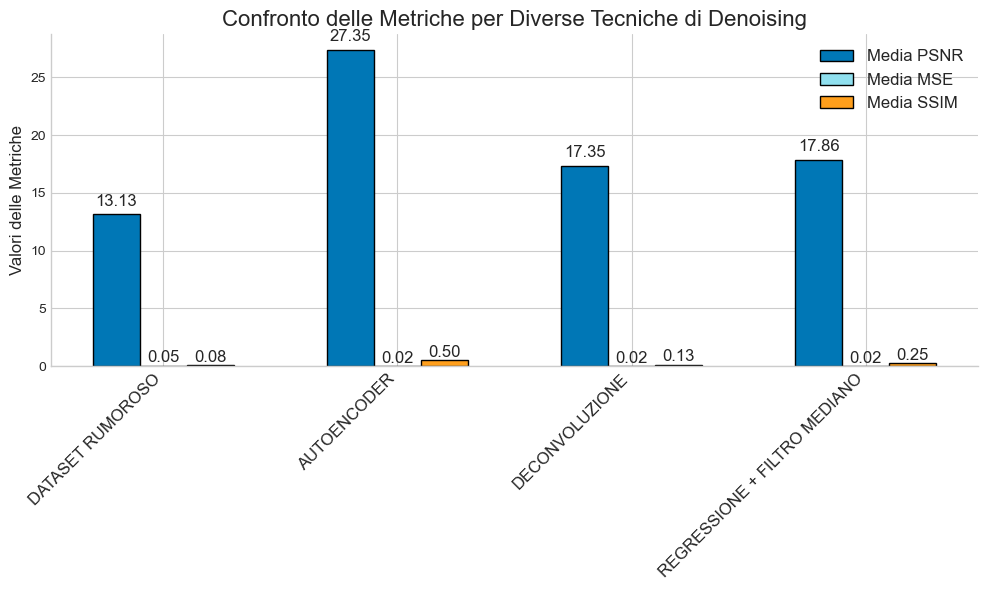

In [15]:
import matplotlib.pyplot as plt

# Dati forniti
techniques = ['DATASET RUMOROSO', 'AUTOENCODER', 'DECONVOLUZIONE', 'REGRESSIONE + FILTRO MEDIANO']
media_psnr = [13.13, 27.35, 17.35, 17.86]
media_mse = [0.05, 0.02, 0.02, 0.02]
media_ssim = [0.08, 0.5, 0.13, 0.25]

# Stile personalizzato
plt.style.use('seaborn-whitegrid')

# Crea un grafico a barre per le tre metriche
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions1 = range(len(techniques))
bar_positions2 = [x + bar_width for x in bar_positions1]
bar_positions3 = [x + 2 * bar_width for x in bar_positions1]

# Barre per Media PSNR
ax.bar(bar_positions1, media_psnr, width=bar_width, label='Media PSNR', color='#0077b6', edgecolor='black')

# Barre per Media MSE
ax.bar(bar_positions2, media_mse, width=bar_width, label='Media MSE', color='#90e0ef', edgecolor='black')

# Barre per Media SSIM
ax.bar(bar_positions3, media_ssim, width=bar_width, label='Media SSIM', color='#ff9f1c', edgecolor='black')

# Etichette asse x
ax.set_xticks([x + bar_width for x in bar_positions1])
ax.set_xticklabels(techniques, rotation=45, ha='right', fontsize=12)

# Etichette asse y
ax.set_ylabel('Valori delle Metriche', fontsize=12)

# Titolo del grafico
ax.set_title('Confronto delle Metriche per Diverse Tecniche di Denoising', fontsize=16)

# Legenda
ax.legend(loc='upper right', fontsize=12)

# Rimuovi assi superiori e destri
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Aggiungi griglia solo per gli assi principali
ax.yaxis.grid(True)

# Aggiungi le etichette dei valori sopra le barre
for xpos, ypos, value in zip(bar_positions1, media_psnr, media_psnr):
    ax.text(xpos, ypos + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

for xpos, ypos, value in zip(bar_positions2, media_mse, media_mse):
    ax.text(xpos, ypos + 0.002, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

for xpos, ypos, value in zip(bar_positions3, media_ssim, media_ssim):
    ax.text(xpos, ypos + 0.03, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()
